# Vergleich der Mittelwerte eines einzelnen Pixel zu den restlichen STEP-Pixeln

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from STEP import STEP

In [11]:
ebins = np.array([  0.98 ,   2.144,   2.336,   2.544,   2.784,   3.04 ,   3.312,
         3.6  ,   3.92 ,   4.288,   4.672,   5.088,   5.568,   6.08 ,
         6.624,   7.2  ,   7.84 ,   8.576,   9.344,  10.176,  11.136,
        12.16 ,  13.248,  14.4  ,  15.68 ,  17.152,  18.688,  20.352,
        22.272,  24.32 ,  26.496,  28.8  ,  31.36 ,  34.304,  37.376,
        40.704,  44.544,  48.64 ,  52.992,  57.6  ,  62.72 ,  68.608,
        74.752,  81.408,  89.088,  97.28 , 105.984, 115.2  , 125.44 ,
       137.216, 149.504, 162.816, 178.176, 194.56 , 211.968, 230.4  ,
       372.736])
def grenz(t):
    return -0.5*t + 20

In [2]:
dat = STEP(2021, 12, 4, rpath='data/STEP/', mag_path='data/mag/srf', mag_frame = 'srf')
period =(dt.datetime(2021,12,4,13,50),dt.datetime(2021,12,4,14,30))

STEP-Data loaded successfully.
STEP-Data combined successfully.
2021-12-04 00:00:00 data/mag/srf/2021/solo_L2_mag-srf-normal_20211204_V01.cdf


Ausprobieren Scatter-Plot für Energie-Vergleich. Danach auch Histogramm ausprobieren...  
Ist Histogramm überhaupt sinnvoll, wenn ich so wenige Datenpunkte habe?  
Lineare Regression macht keinen Sinn, wenn die Unterschiede energieabhängig sind.

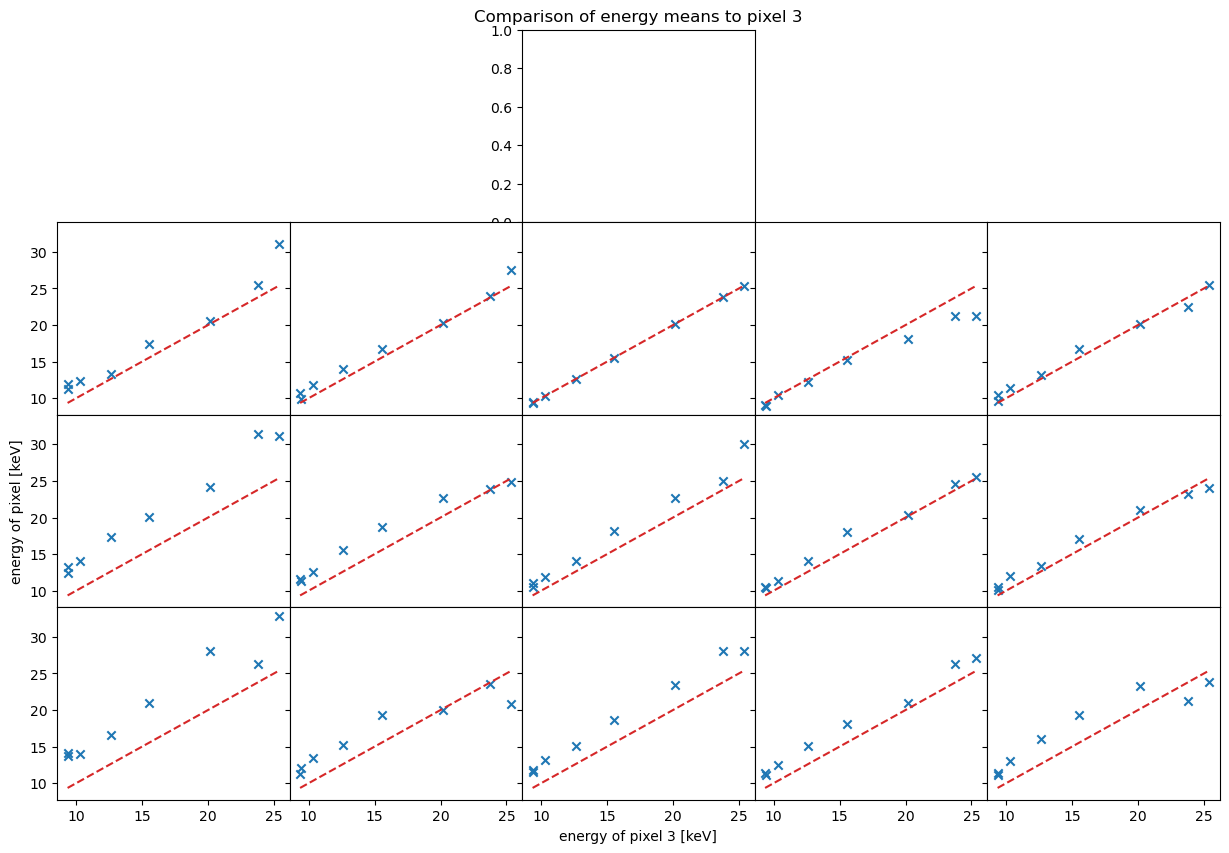

In [34]:
def energy_comparison(self,pixel_comparing):
    pixel_means, pixel_var = dat.calc_energy_means(ebins=ebins,head=-1, period=period, grenzfunktion=grenz, norm='ptmax')
    pw, pw_time = dat.calc_pw(period, window_width=5)
    corrected_energies = []

    for pixel2 in range(1,16):
        # Übergebe willkürliche Fehler, da ich diese eh nicht brauche.
        corrected_energies.append(dat.energy_correction(pixel_means[pixel2],pw[pixel_comparing-1],pw[pixel2-1],2,2)[0])

    fig, axes = dat.step_plot(f'energy of pixel {pixel_comparing} [keV]', f'energy of pixel [keV]', f'Comparison of energy means to pixel {pixel_comparing}')

    min_energy = min(pixel_means[pixel_comparing])
    max_energy = max(pixel_means[pixel_comparing])

    for i, ax in enumerate(axes):
        if i == 0:
            continue
        ax.scatter(pixel_means[pixel_comparing],pixel_means[i],marker='x')
        ax.plot([min_energy, max_energy], [min_energy, max_energy], c='tab:red',linestyle='--')
    
energy_comparison(dat,3)